In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
from nltk import tokenize

In [218]:
#load data
data_folder = "../../Data/Tsv_data/"
train_file = "train.tsv"
test_file = "test.tsv"
train_data = pd.read_csv(data_folder + train_file, delimiter = "\t") 
#test_data = pd.read_csv(data_folder + test_file, delimiter = "\t") 

In [4]:
train_data.head(5)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [15]:
train_data["item_condition_id"].value_counts(dropna = False)/float(train_data.shape[0])

1    0.432063
3    0.291501
2    0.253268
4    0.021559
5    0.001608
Name: item_condition_id, dtype: float64

In [16]:
train_data["shipping"].value_counts(dropna = False)/float(train_data.shape[0])

0    0.552726
1    0.447274
Name: shipping, dtype: float64

In [18]:
train_data["brand_name"].nunique()

4809

In [19]:
train_data["category_name"].nunique()

1287

In [222]:
all_categories = train_data["category_name"].value_counts(dropna=False)
print all_categories[all_categories > 5].shape

(1045,)


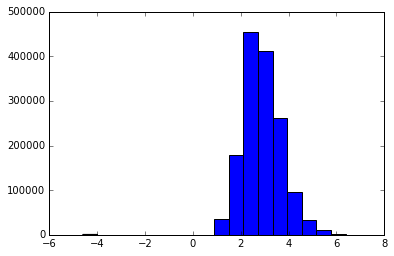

In [30]:
plt.hist(np.log(train_data["price"] +  0.01), bins = 20)
plt.show()

In [151]:
#looking at name and item text
from nltk.tokenize import TweetTokenizer, word_tokenize
tknzr = TweetTokenizer(preserve_case=False, strip_handles=False, reduce_len=True)

In [220]:
train_data["name"] = train_data["name"].str.replace("\[rm\]", "special_rm")
train_data["item_description"] = train_data["item_description"].str.replace("\[rm\]", "special_rm")

In [221]:
train_data.head(5)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for spec...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [211]:
rand_sample = train_data.sample()
name_example = rand_sample["name"].values[0]
print "name ", name_example
print "tokenized name", tknzr.tokenize(unicode(name_example, "utf-8"))
print
item_example = rand_sample["item_description"].values[0]
print "item ", item_example 
print "tokenized item", tknzr.tokenize(unicode(item_example, "utf-8"))

name  2 Pairs New Thumbstick Controller Grips!
tokenized name [u'2', u'pairs', u'new', u'thumbstick', u'controller', u'grips', u'!']

item  4 Brand new controller grip! Great stocking stuffers, Christmas is just around the corner! RESERVED for buyer! Colors are: 2 Red and 2 Grey I have other colors available, so let me know which ones you want, and I'll make a listing for you! You get all of the grips shown in the picture! Compatible with: Xbox One Xbox 360 PlayStation 4 PlayStation 3 PlayStation 2 Wii U Sega Dreamcast GameCube
tokenized item [u'4', u'brand', u'new', u'controller', u'grip', u'!', u'great', u'stocking', u'stuffers', u',', u'christmas', u'is', u'just', u'around', u'the', u'corner', u'!', u'reserved', u'for', u'buyer', u'!', u'colors', u'are', u':', u'2', u'red', u'and', u'2', u'grey', u'i', u'have', u'other', u'colors', u'available', u',', u'so', u'let', u'me', u'know', u'which', u'ones', u'you', u'want', u',', u'and', u"i'll", u'make', u'a', u'listing', u'for', u'you', 

In [153]:
#looking at name text
splitted_names = train_data["name"].apply(lambda x: tknzr.tokenize(unicode(x, "utf-8")))

In [154]:
splitted_names.apply(lambda x: len(x)).describe()

count    1.482535e+06
mean     4.714979e+00
std      1.955277e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      6.000000e+00
max      2.100000e+01
Name: name, dtype: float64

In [155]:
#looking at description text
splitted_description = train_data["item_description"].apply(lambda x: [] if pd.isnull(x) \
                                                            else tknzr.tokenize(unicode(x, "utf-8")))

In [156]:
splitted_description_clean.apply(lambda x: len(x)).describe()

count    1.482531e+06
mean     2.568532e+01
std      3.038411e+01
min      1.000000e+00
25%      7.000000e+00
50%      1.500000e+01
75%      3.100000e+01
max      2.450000e+02
Name: item_description, dtype: float64

In [157]:
from collections import Counter
all_words = Counter()

def add_words_to_dict(wlist):
    for w in wlist:
        all_words[w] +=1
        
_ = splitted_names.apply(lambda x: add_words_to_dict(x))
_ = splitted_description.apply(lambda x: add_words_to_dict(x))

In [165]:
words_df = pd.DataFrame({"word": all_words.keys(), "count": all_words.values()})

In [166]:
words_df.shape

(264619, 2)

In [176]:
words_df[words_df["count"] > 10000].shape

(678, 2)